Importar librerias

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carga de datos

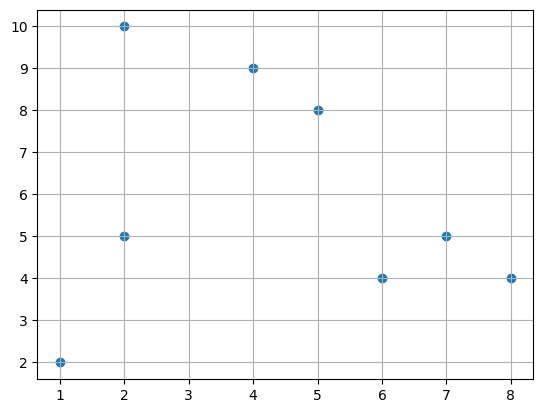

In [21]:
datos = [
    (2, 10), # A
    (2, 5),  # B
    (8, 4),  # C
    (5, 8),  # D
    (7, 5),  # E
    (6, 4),  # F
    (1, 2),  # G
    (4, 9)   # H
]
X = np.array(datos)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

Centroides Iniciales

In [22]:
k = 3

centroides_iniciales = [0, 3, 6]  # Índices de A, D y G

clusters = {}
for idx, punto_idx in enumerate(centroides_iniciales):
    center = np.array(datos[punto_idx])
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster

Visualizar Centroides

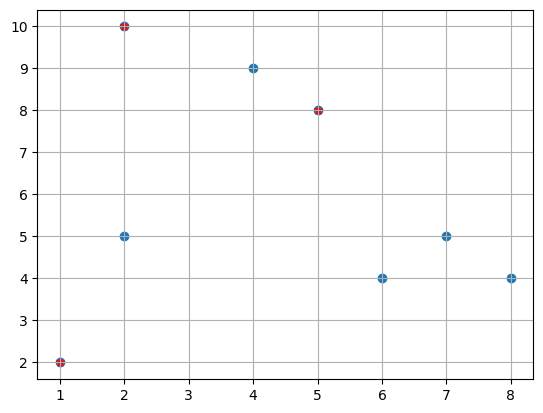

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

Distancia Euclidiana

In [24]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

Asigna los puntos al centroide más cercano

In [25]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [26]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

Iteraciones

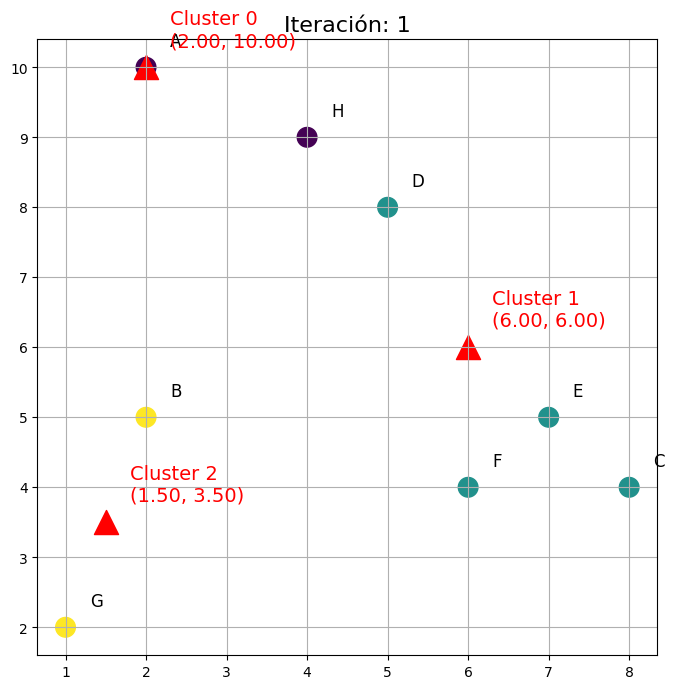

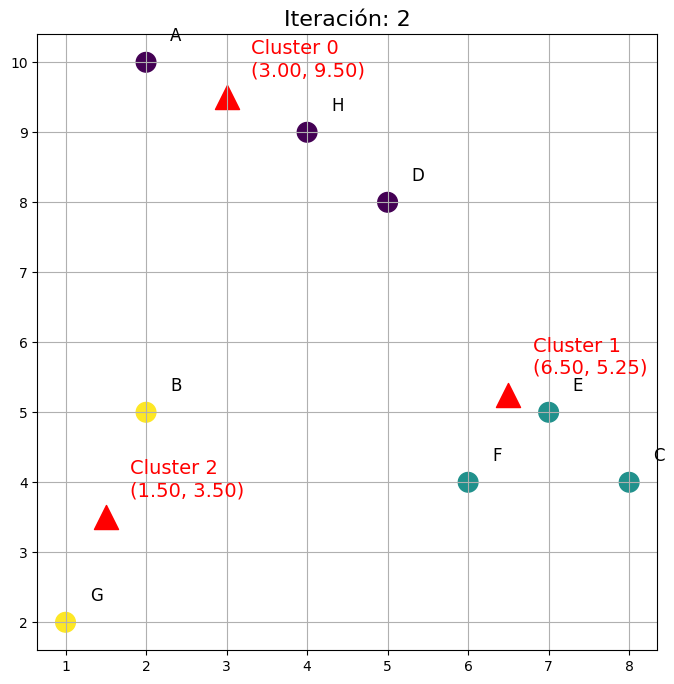

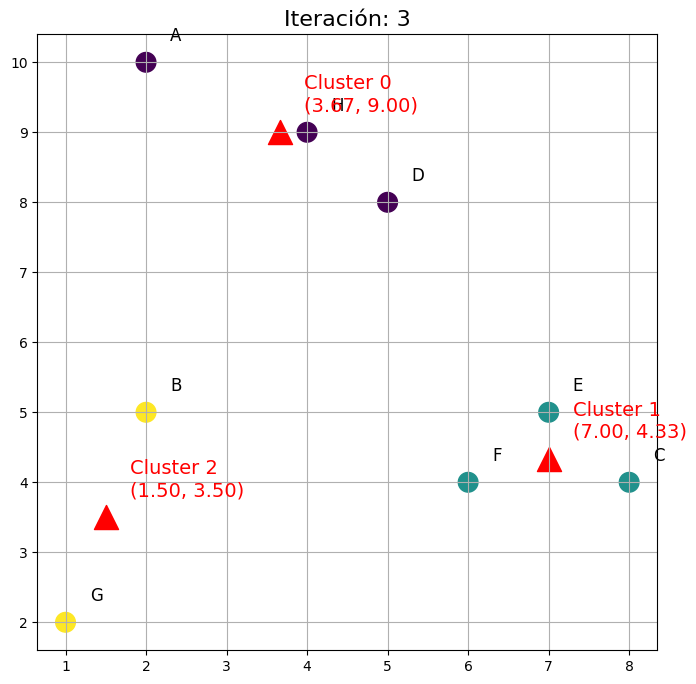

In [27]:
max_iters = 3

for it in range(max_iters):
    old_centers = np.array([clusters[i]['center'] for i in range(k)])
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(X, clusters)
    new_centers = np.array([clusters[i]['center'] for i in range(k)])

    # Dibujar los puntos con colores según su cluster
    plt.figure(figsize=(8, 8))  # Aumentar el tamaño de la figura
    plt.scatter(X[:, 0], X[:, 1], c=pred_cluster(X, clusters), s=200)  # Aumentar tamaño de los puntos

    # Agregar labels a los puntos
    for i, punto in enumerate(X):
        plt.text(punto[0] + 0.3, punto[1] + 0.3, f"{chr(65+i)}", fontsize=12)  # Aumentar tamaño de las etiquetas

    # Dibujar los centroides y agregar coordenadas
    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], marker='^', c='red', s=300)  # Aumentar tamaño de los centroides
        plt.text(center[0] + 0.3, center[1] + 0.3, f"Cluster {i}\n({center[0]:.2f}, {center[1]:.2f})", 
                 fontsize=14, color='red')  # Aumentar tamaño de las coordenadas

    plt.title(f"Iteración: {it+1}", fontsize=16)  # Aumentar tamaño del título
    plt.grid(True)
    plt.show()